In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


# make dataset to train

In [5]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [6]:
# hyper parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [8]:
# load data
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # reverse order

# split train-test set
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.55480085 0.56827642 0.55609305 0.25521197 0.54314032]] -> [0.42220981]
[[0.56812508 0.5734144  0.58745646 0.16158466 0.57700785]
 [0.55324827 0.55760919 0.59103264 0.09538406 0.57936654]
 [0.55942385 0.56279826 0.58594925 0.09355562 0.59256855]
 [0.57701942 0.57171309 0.59389673 0.12980192 0.57588125]
 [0.55873379 0.58192093 0.59650998 0.19034687 0.59267427]
 [0.55480085 0.56827642 0.55609305 0.25521197 0.54314032]
 [0.50070351 0.49022047 0.44665564 0.38158107 0.42220981]] -> [0.34169519]
[[0.55324827 0.55760919 0.59103264 0.09538406 0.57936654]
 [0.55942385 0.56279826 0.58594925 0.09355562 0.59256855]
 [0.57701942 0.57171309 0.59389673 0.12980192 0.57588125]
 [0.55873379 0.58192093 0.59650998 0.19034687 0.59267427]
 [0.55480085 0.56827642 0.55609305 0.25521197 0.54314032]
 [0.50070351 0.49022047 0.44665564 0.38158107 0.42220981]
 [0.2703066  0.35166615 0.27739811 0.51648293 0.34169519]] -> [0.3151152]
[[0.55942385 0.56279826 0.58594925 0.09355562 0.59256855]
 [0.57701942 0.5717130

 [0.6083567  0.6241084  0.62972384 0.16068134 0.64607843]] -> [0.72295554]
[[0.51819437 0.51606234 0.44673668 0.44930021 0.47583768]
 [0.44116077 0.48157973 0.48353985 0.16077452 0.49124905]
 [0.5198131  0.5399353  0.54291034 0.1485119  0.56304895]
 [0.56189666 0.56899508 0.56980869 0.19508377 0.54267959]
 [0.53953601 0.58390795 0.56047886 0.21707449 0.61483787]
 [0.6083567  0.6241084  0.62972384 0.16068134 0.64607843]
 [0.65343805 0.69042139 0.70115598 0.22260944 0.72295554]] -> [0.72283633]
[[0.44116077 0.48157973 0.48353985 0.16077452 0.49124905]
 [0.5198131  0.5399353  0.54291034 0.1485119  0.56304895]
 [0.56189666 0.56899508 0.56980869 0.19508377 0.54267959]
 [0.53953601 0.58390795 0.56047886 0.21707449 0.61483787]
 [0.6083567  0.6241084  0.62972384 0.16068134 0.64607843]
 [0.65343805 0.69042139 0.70115598 0.22260944 0.72295554]
 [0.68365194 0.7011494  0.73347024 0.28161166 0.72283633]] -> [0.76363411]
[[0.5198131  0.5399353  0.54291034 0.1485119  0.56304895]
 [0.56189666 0.568995

In [9]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x


net = Net(data_dim, hidden_dim, output_dim, 1)

In [10]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [11]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.2271038442850113
1 0.18340936303138733
2 0.15106438100337982
3 0.12612313032150269
4 0.10598734766244888
5 0.08915018290281296
6 0.07493706792593002
7 0.06327901035547256
8 0.054496027529239655
9 0.049023859202861786
10 0.04693441092967987
11 0.04731706529855728
12 0.04838264361023903
13 0.04839478060603142
14 0.04633766785264015
15 0.04207771271467209
16 0.03620169684290886
17 0.029662009328603745
18 0.02338656224310398
19 0.018011242151260376
20 0.013800663873553276
21 0.010714655742049217
22 0.008532220497727394
23 0.0069765085354447365
24 0.005824481602758169
25 0.004987423773854971
26 0.004524713382124901
27 0.0045546842738986015
28 0.005089899059385061
29 0.005920968484133482
30 0.006684893276542425
31 0.0070726750418543816
32 0.006973991636186838
33 0.006471905391663313
34 0.005753521807491779
35 0.005014693830162287
36 0.004395292606204748
37 0.003953744191676378
38 0.0036766391713172197
39 0.0035109843593090773
40 0.0034013085532933474
41 0.003315108362585306
42 0.00324889

342 0.001421867753379047
343 0.001420359592884779
344 0.0014188579516485333
345 0.0014173623640090227
346 0.0014158725971356034
347 0.001414389000274241
348 0.0014129112241789699
349 0.0014114396180957556
350 0.0014099737163633108
351 0.0014085139846429229
352 0.0014070604229345918
353 0.0014056123327463865
354 0.0014041701797395945
355 0.0014027344295755029
356 0.0014013040345162153
357 0.0013998800422996283
358 0.0013984611723572016
359 0.0013970490545034409
360 0.0013956426410004497
361 0.0013942415826022625
362 0.0013928472762927413
363 0.0013914587907493114
364 0.0013900762423872948
365 0.001388699747622013
366 0.00138732953928411
367 0.001385965384542942
368 0.0013846071669831872
369 0.0013832558179274201
370 0.0013819100568071008
371 0.0013805715134367347
372 0.0013792391400784254
373 0.0013779130531474948
374 0.0013765936018899083
375 0.0013752812519669533
376 0.0013739755377173424
377 0.0013726766919717193
378 0.0013713848311454058
379 0.0013701001880690455
380 0.0013688224134

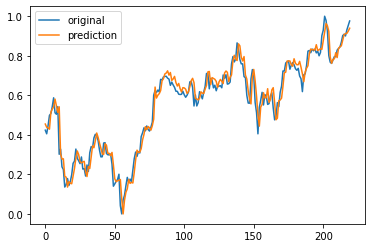

In [12]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()